<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp

#1: Solución númerica de a EDO por medios numericos (RK4)

Al tener una EDO de orden 2, replazamos $\frac{dθ}{dx} = u$. Asi tenemos:

\begin{equation}
\frac{\mathrm{d}u}{\mathrm{d}x}= a²θ
\end{equation}

\begin{equation}
\frac{\mathrm{d}θ}{\mathrm{d}x}= u
\end{equation}

In [23]:
def edo_rk4(y0,t0,tf,n,f):

  h = (xf-x0)/n
  t = np.linspace(t0,tf,n)
  y = np.zeros(len(t))

  for i in range(0,len(t)):

   k1 = f(t[i],y0)
   k2 = f(t[i] + 0.5*h, y0 + 0.5*k1*h)
   k3 = f(t[i] + 0.5*h, y0 + 0.5*k2*h)
   k4 = f(t[i] + h, y0 + k3*h)

   y1 = y0 + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

   y[i] = y1

   y0 = y1

  graf = np.array([t,y])
  return graf

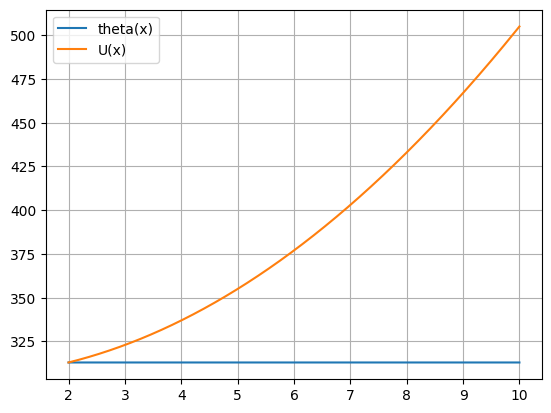

In [93]:
# Parametros del Problema

Ac = 5e10-5
p = 0.102
k = 200
h = 20
a = (h*p)/(Ac*k)
ap = 2 # parametro a de prueva

ta = 300

# Limites del problema

x0 = 2
xf = 10
t0 = 313
n = 10000
H = (xf-x0)/n

d_u = lambda theta,u: (ap**2)*theta

# Método RK4 para encontrar U(x)

Xn = edo_rk4(t0,x0,xf,n,d_u)[0]
Un = edo_rk4(t0,x0,xf,n,d_u)[1]

U = sc.interpolate.CubicSpline(Xn, Un,)

# Método RK4 para encontrar theta(x)

d_theta = U

theta_n = edo_rk4(t0,x0,xf,n,d_theta)[1]

plt.plot(Xn, theta_n, label = "theta(x)")
plt.plot(Xn,U(Xn), label = "U(x)")
plt.legend()
plt.grid()
plt.show()

# 3: Solución exacta de la EDO
# 4: X para el cual T(x) = 305 K

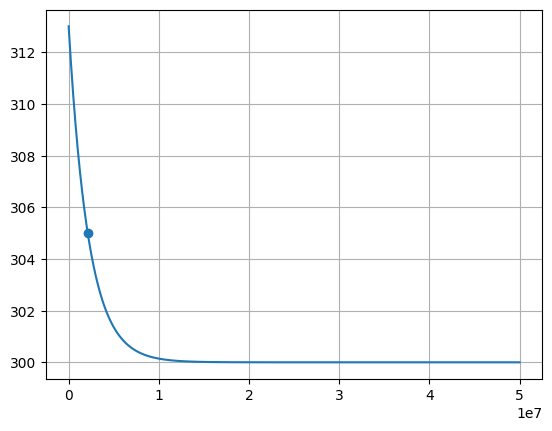

In [90]:
# Parametros del Problema

Ac = 5e10-5
p = 0.102
k = 200
h = 20
a = (h*p)/(Ac*k)
ta = 300

# Limites del problema

x0 = 2
xf = 5e7
t0 = 313
n = 1000
H = (xf-x0)/n

T = lambda x: ta + (t0 - ta)*np.exp(-x*np.sqrt(a))


Xt = np.linspace(x0,xf,n)
Yt = T(Xt)

T_305 = lambda x: ta + (t0 - ta)*np.exp(-x*np.sqrt(a)) - 305
dT_305 = lambda x: -np.sqrt(a)*(t0-ta)*np.exp(-x*np.sqrt(a))


x_305 = sc.optimize.newton(T_305,1,dT_305)
x_305

plt.plot(Xt,Yt)
plt.scatter(x_305,T(x_305))
plt.grid()
plt.show()
